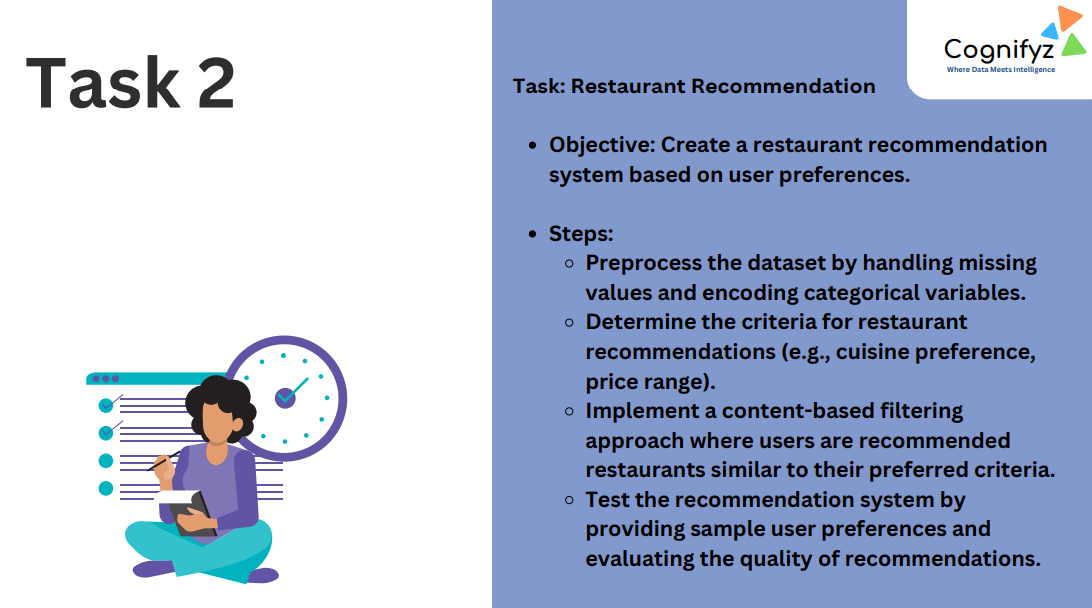

## Created by `Meet Parkin Jariwala`

# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Loading the dataset

In [2]:
df = pd.read_csv('Dataset.csv')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df_clean = df.copy()

## Reomving missing values

In [4]:
df_clean = df_clean.dropna()
df_clean.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Craeting a new column `Combined Features`.
## This will contain values from `Cuisines`, `Price range`, `Has Online delivery`, `City`.

In [5]:
df_clean.loc[: ,'Combined Features'] = df_clean['Cuisines'] + ' ' + df_clean['Price range'].astype(str) + ' ' + df_clean['Has Online delivery'] + ' ' + df_clean['City']

## Function for restaurant recommendation

In [6]:
def restaurant_recommendation(df, preferred_cuisines, preferred_price_range, min_rating, online_delivery, preferred_city, top_n):
    
    required_columns = ['Aggregate rating', 'Has Online delivery', 'City', 'Combined Features']
    df_new = df.copy()
    
    # Filter based on the minimum rating
    df_new = df_new[df_new['Aggregate rating'] >= min_rating]
    
    # Filter based on whether the restaurant has online delivery
    df_new = df_new[df_new['Has Online delivery'] == online_delivery]
    
    # Filter based on the preferred city
    df_new = df_new[df_new['City'] == preferred_city]

    # If no restaurants match the criteria, return a message
    if df_new.empty:
        return "No restaurants found matching the criteria."
    
    # Combine user preferences into a single string for vectorization
    user_preference_str = ' '.join(preferred_cuisines) + f" {preferred_price_range} {online_delivery} {preferred_city}"

    # Initialize a CountVectorizer to transform text data into vectors
    vectorizer = CountVectorizer()
    
    # Fit and transform the 'Combined Features' column of the filtered DataFrame
    combined_feature_matrix = vectorizer.fit_transform(df_new['Combined Features'])
    
    # Transform the user preference string into a vector
    user_preference_matrix = vectorizer.transform([user_preference_str])
    
    # Compute cosine similarity between user preferences and restaurant features
    cosine_sim = cosine_similarity(user_preference_matrix, combined_feature_matrix).flatten()
    
    # Get the indices of the top N restaurants based on similarity scores
    top_indices = cosine_sim.argsort()[-top_n:][::-1]
    
    # If no top indices are found, return a message
    if not top_indices.size:
        return "No restaurants found matching the criteria."
    
    # Select the top recommended restaurants from the filtered DataFrame
    recommendation = df_new.iloc[top_indices]

    # Return the recommended restaurants with selected columns
    return recommendation[['Restaurant Name', 'City', 'Cuisines', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Has Online delivery']]


## Taking input from user and generating recommendations

### EXAMPLE:
- `preferred_cuisines` = ['Italian', 'Chinese']
- `preferred_price_range` = 3
- `min_rating` = 4.0
- `online_delivery` = 'Yes'
- `preferred_city` = 'Mumbai'  
- `top_n` = 5

In [7]:
preferred_cuisines = [str(x) for x in input("Your choice for cuisines: ").split(',')]
preferred_price_range = int(input("Your preferred price range: "))
min_rating = float(input("Minimum Rating of restaurant: "))
online_delivery = input("Do you prefer online delivery(Yes/No): ")
preferred_city = input("Search for which city: ")
top_n = 5

# Function call 
recommendations = restaurant_recommendation(
    df_clean,
    preferred_cuisines,
    preferred_price_range,
    min_rating,
    online_delivery,
    preferred_city,
    top_n
)

recommendations

Your choice for cuisines:  Italian, Chinese
Your preferred price range:  3
Minimum Rating of restaurant:  4.0
Do you prefer online delivery(Yes/No):  Yes
Search for which city:  Mumbai


,Restaurant Name,City,Cuisines,Average Cost for two,Price range,Aggregate rating,Has Online delivery
2483,The Fusion Kitchen,Mumbai,"North Indian, Italian, Chinese, Mexican",1000,3,4.7,Yes
2498,Tea Villa Cafe,Mumbai,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",1000,3,4.1,Yes
2485,Tea Villa Cafe,Mumbai,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",1000,3,4.1,Yes
2492,Joey's Pizza,Mumbai,Pizza,800,2,4.5,Yes
2490,SpiceKlub,Mumbai,North Indian,1500,3,4.2,Yes
